## Lesson 10 Assignment
Jean Ruggiero | Python 220

In [1]:
from timeit import timeit as timer
import matplotlib.pyplot as plt
import time

Measuring the performance gains of memoization. Let's start with a simple recursive factorial function without memoization.

In [2]:
def factorial(n):
    '''
    Returns n!
    '''
    if n < 2:
        return 1
    else:
        return factorial(n-1)*n

Let's time it!

In [3]:
inputs = list(range(1000))

In [4]:
time_without_memoization = []
for n in inputs:
    time_without_memoization.append(timer(f'factorial(n)', globals=globals(), number=100))

Now let's define a recursive factorial function that uses memoization.

In [5]:
memo = {}
def memoization_factorial(n):
    '''
    Return n!, use memoization to improve performance.
    '''
    if n < 2:
        return 1
    else:
        if n-1 in memo:
            memo[n] = n*memo[n-1]
        else:
            memo[n] = memoization_factorial(n-1)*n
        return memo[n]

And now we'll time it and see if it's faster!

In [6]:
time_with_memoization = []
for n in inputs:
    memo = {}
    time_with_memoization.append(timer(f'memoization_factorial(n)', globals=globals(), number=100))

Just for fun, let's see what happens when we don't clear the memoization cache between calls to `memoization_factorial`...

In [7]:
memo = {}
time_with_memoization_cache = []
for n in inputs:
    time_with_memoization_cache.append(timer(f'memoization_factorial(n)', globals=globals(), number=100))

Plot up the timer results so we can see how our three implementations compare.

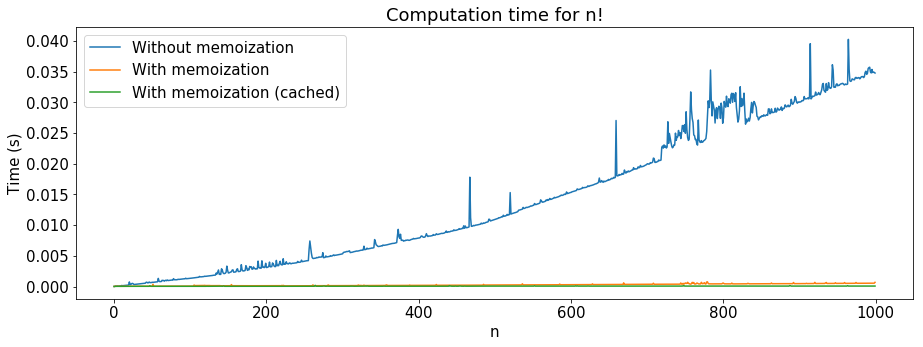

In [8]:
plt.rcParams['figure.figsize'] = [15, 5]
font = {'size': 15}
plt.rc('font', **font)

fig, ax = plt.subplots()
ax.plot(inputs,time_without_memoization, label='Without memoization')
ax.plot(inputs,time_with_memoization, label='With memoization')
ax.plot(inputs, time_with_memoization_cache, label='With memoization (cached)')
plt.ylabel('Time (s)');
plt.xlabel('n');
plt.title('Computation time for n!');
plt.legend();

Clearly, memoization has significantly sped up the factorial computation. There's a catch though: memoization only pays off if there are multiple calls to the factorial function. 

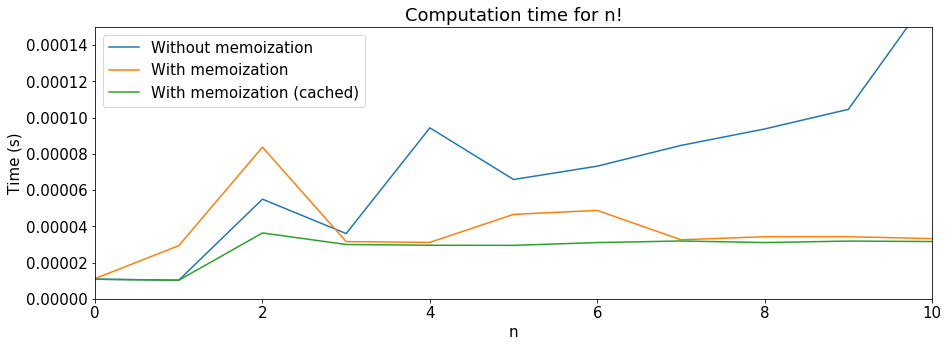

In [9]:
ax.set_ylim([0,0.00015]);
ax.set_xlim([0,10]);
fig

When we zoom in, we see that the first call to the factorial function "costs" the same amount of time. In fact, memoization doesn't even pay off until we compute $3!$ and higher. This makes sense, since no recursion is involved with $0!$ or $1!$, and we need to recurse once to compute $2!$.

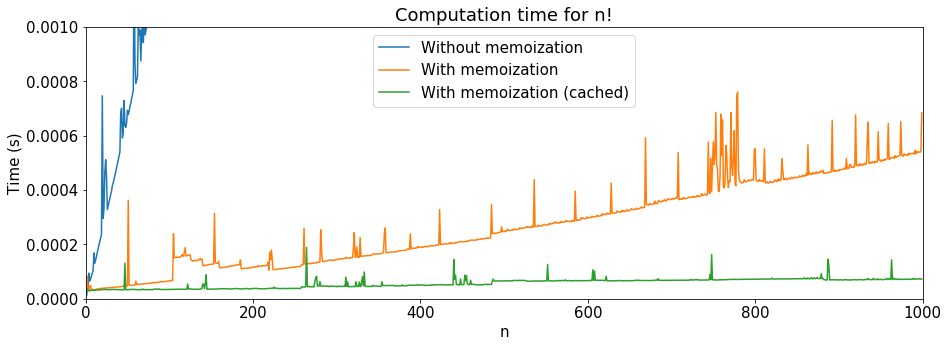

In [10]:
ax.set_ylim([0,0.001]);
ax.set_xlim([0, 1000]);
fig

Zooming in shows that the recursive factorial function with memoization is still O(N), albeit much faster than the recursive solution without memoization - on the order of 100 times faster for n = 1000. Alas, we can't try it for n much larger than 1000 due to the python interpreter's maximum recursion depth limit.

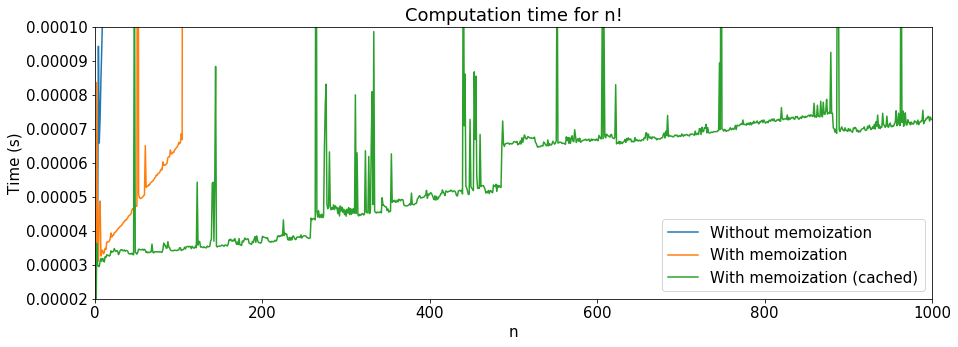

In [11]:
ax.set_ylim([0.00002,0.0001]);
fig

Yup, the recursive solution with cached memoization is even faster. Pretty cool! Now we're barely doing any computation; it's mostly hash table lookups. If you know you need to compute the factorial multiple times, why not save the memoization cache between calls? If you have to compute the factorial of a number you've already computed, it would be O(1) since it would just be a table lookup.

There's one more thing to consider here and that's space complexity, and where in memory the space is being allocated. All three implementations are O(N) space complexity. The difference is in where the space is allocated, and whether or not it's freed up after the computation is complete:
- For the resursive factorial function without memoization, all of the space used to perform the computation is on the call stack, and is freed up when the function returns.
- For the recursive factorial function with memoization, the space is in the "heap" and is not automatically freed up after the function returns. It would be on the developer to delete the `memo` cache to free up this space.
- For the recursive factorial function with a memoization cache that does not get deleted between calls, deleting the `memo` cache would defeat the purpose of this optimization, so the space on the heap would likely not be freed up until the program exits.